In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Impute

Processo de preencher valores inexistentes para observações.

Principais métodos:
* drop
* média
* mediana
* moda (valor mais frequente)
* _forward fill_ (preenche com o último valor válido)
* _backward fill_ (preenche com o próximo valor válido)
* Interpolação
* Regressão linear

https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html

In [2]:
N = 500

## Drop

In [3]:
alturas = np.random.normal(1.75, 0.1, size=N)

# remove 20% dos valores
alturas[np.random.randint(0, N, size=int(N * 0.2))] = None

df = pd.DataFrame(data={
    'altura': alturas
})

/home/geovani/Documentos/pos_data_science/.venv/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/geovani/Documentos/pos_data_science/.venv/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Média 1.7455223963508444
Quantidade observações 500


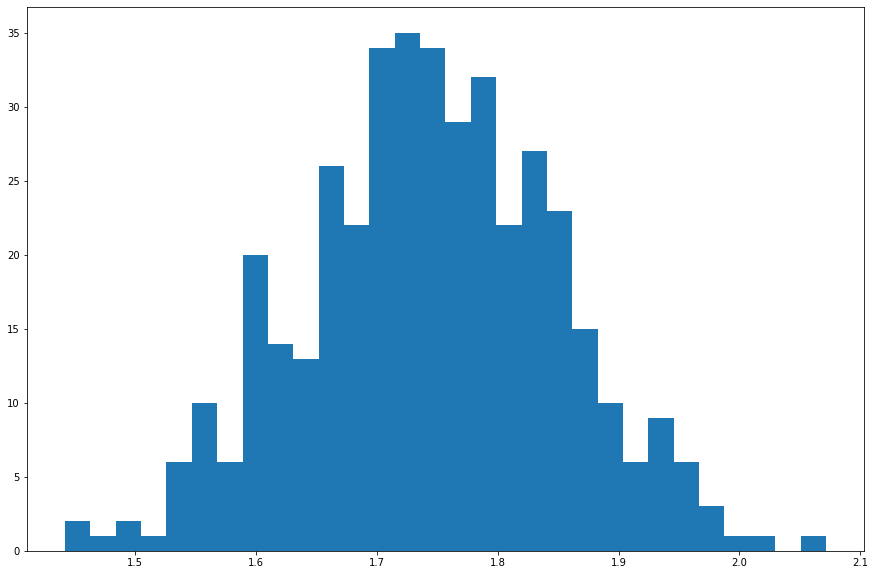

In [4]:
(_, ax) = plt.subplots(1, 1, figsize=(15, 10))
ax.hist(df.altura, bins=30)

print('Média', df.altura.mean())
print('Quantidade observações', len(df))

Média 1.7455223963508444
Quantidade observações 411


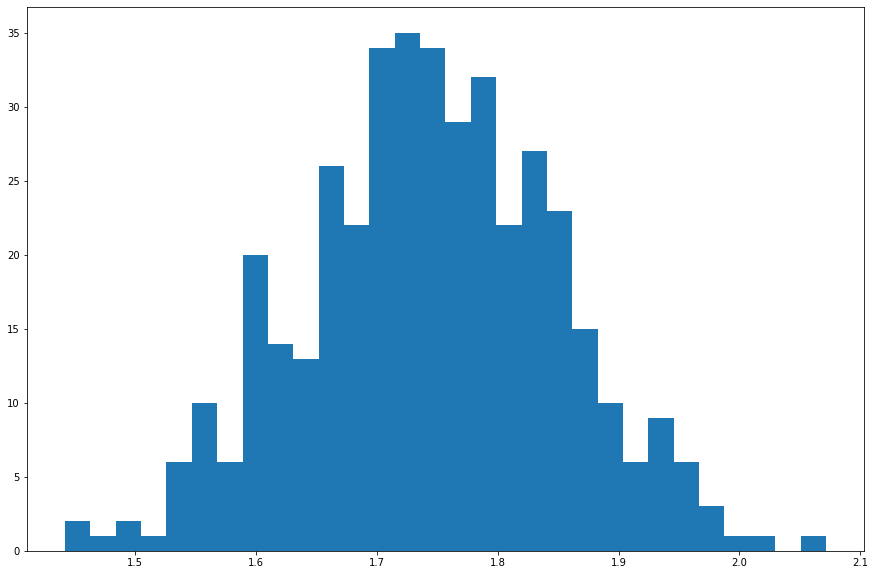

In [5]:
dropped = df.altura.dropna()
(_, ax) = plt.subplots(1, 1, figsize=(15, 10))
ax.hist(df.altura, bins=30)

print('Média', df.altura.mean())
print('Quantidade observações', len(dropped))

## Média

In [6]:
alturas = np.random.normal(1.75, 0.1, size=N)

# remove 20% dos valores
alturas[np.random.randint(0, N, size=int(N * 0.2))] = None

df = pd.DataFrame(data={
    'altura': alturas
})

Média 1.746192179975674


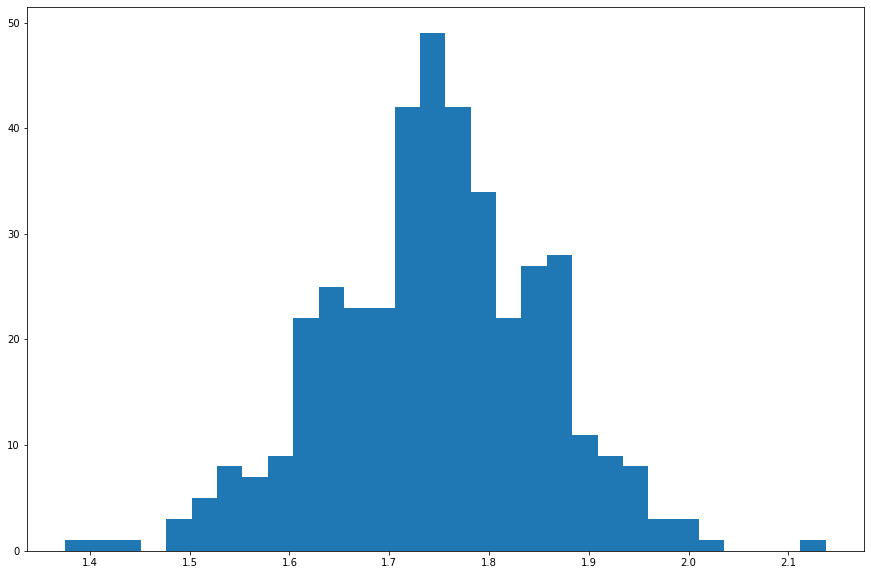

In [7]:
(_, ax) = plt.subplots(1, 1, figsize=(15, 10))
ax.hist(df.altura, bins=30)

print('Média', df.altura.mean())

1.746192179975674


(array([  1.,   1.,   1.,   0.,   3.,   5.,   8.,   7.,   9.,  22.,  25.,
         23.,  23.,  42., 141.,  42.,  34.,  22.,  27.,  28.,  11.,   9.,
          8.,   3.,   3.,   1.,   0.,   0.,   0.,   1.]),
 array([1.37502865, 1.40044068, 1.42585272, 1.45126475, 1.47667678,
        1.50208881, 1.52750084, 1.55291287, 1.57832491, 1.60373694,
        1.62914897, 1.654561  , 1.67997303, 1.70538506, 1.73079709,
        1.75620913, 1.78162116, 1.80703319, 1.83244522, 1.85785725,
        1.88326928, 1.90868132, 1.93409335, 1.95950538, 1.98491741,
        2.01032944, 2.03574147, 2.06115351, 2.08656554, 2.11197757,
        2.1373896 ]),
 <a list of 30 Patch objects>)

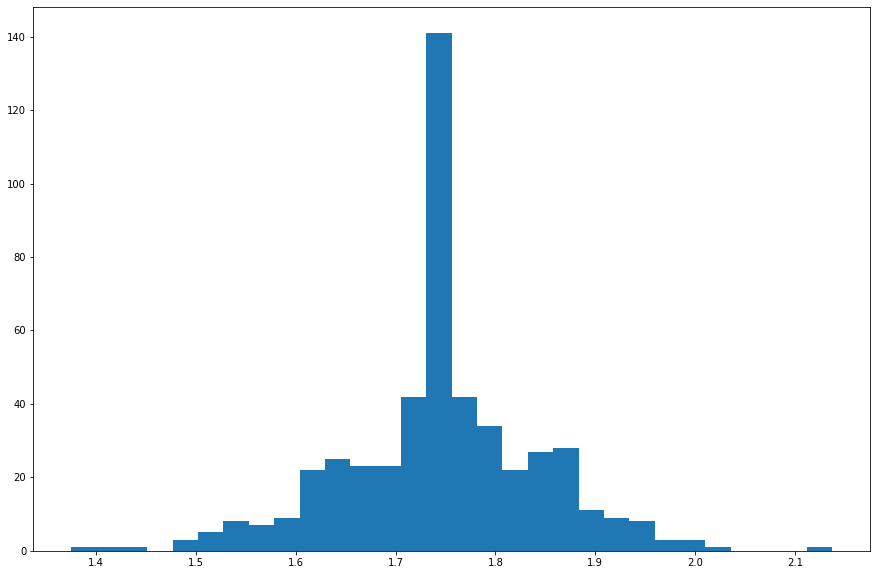

In [8]:
filled = df.altura.fillna(df.altura.mean())
print(filled.mean())

(_, ax) = plt.subplots(1, 1, figsize=(15, 10))
ax.hist(filled, bins=30)

## Mediana

1.7488579385042706


(array([  1.,   1.,   1.,   0.,   3.,   5.,   8.,   7.,   9.,  22.,  25.,
         23.,  23.,  42., 141.,  42.,  34.,  22.,  27.,  28.,  11.,   9.,
          8.,   3.,   3.,   1.,   0.,   0.,   0.,   1.]),
 array([1.37502865, 1.40044068, 1.42585272, 1.45126475, 1.47667678,
        1.50208881, 1.52750084, 1.55291287, 1.57832491, 1.60373694,
        1.62914897, 1.654561  , 1.67997303, 1.70538506, 1.73079709,
        1.75620913, 1.78162116, 1.80703319, 1.83244522, 1.85785725,
        1.88326928, 1.90868132, 1.93409335, 1.95950538, 1.98491741,
        2.01032944, 2.03574147, 2.06115351, 2.08656554, 2.11197757,
        2.1373896 ]),
 <a list of 30 Patch objects>)

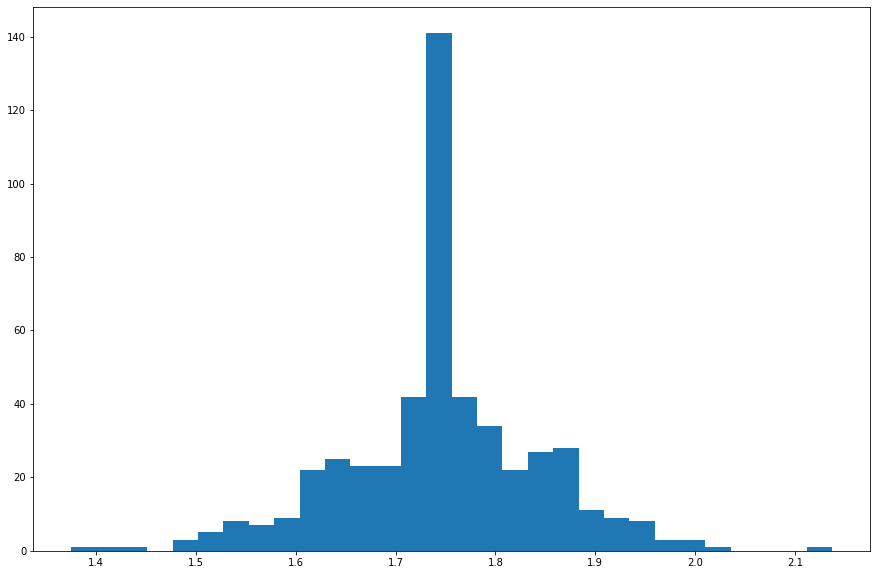

In [10]:
filled = df.altura.fillna(df.altura.median())
print(filled.median())

(_, ax) = plt.subplots(1, 1, figsize=(15, 10))
ax.hist(filled, bins=30)

## Moda

In [11]:
tipo = np.random.randint(0, 3, size=N).astype(object)
# remove 20% dos valores
tipo[np.random.randint(0, N, size=int(N * 0.2))] = None

df = pd.DataFrame(data={
    'tipo': tipo
})
df.tipo.value_counts()

2    139
1    136
0    136
Name: tipo, dtype: int64

In [12]:
filled = df.tipo.fillna(df.tipo.mode()[0])
filled.value_counts()

2    228
1    136
0    136
Name: tipo, dtype: int64

## Forward fill

In [17]:
preco_base = 56.98
variacoes = np.random.normal(0, 0.01, size=N)
precos = preco_base + np.cumsum(variacoes) * preco_base

# remove 20% dos valores
precos[np.random.randint(0, N, size=int(N * 0.2))] = None

df = pd.DataFrame(data={'preco': precos})

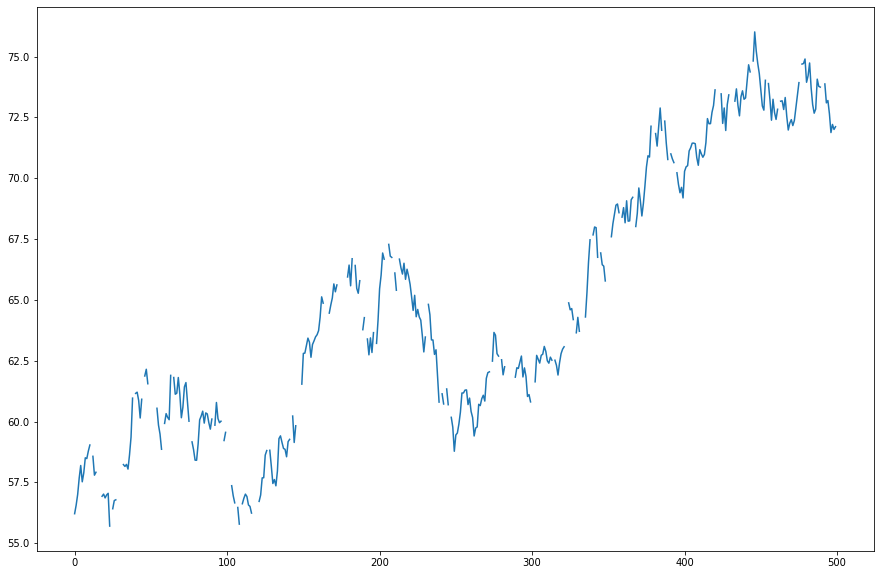

In [18]:
(_, ax) = plt.subplots(1, 1, figsize=(15, 10))
ax.plot(df.preco)

Neste caso, é necessário usar `ffill`, caso contrário, estaríamos preenchendo um dado com um valor do futuro.

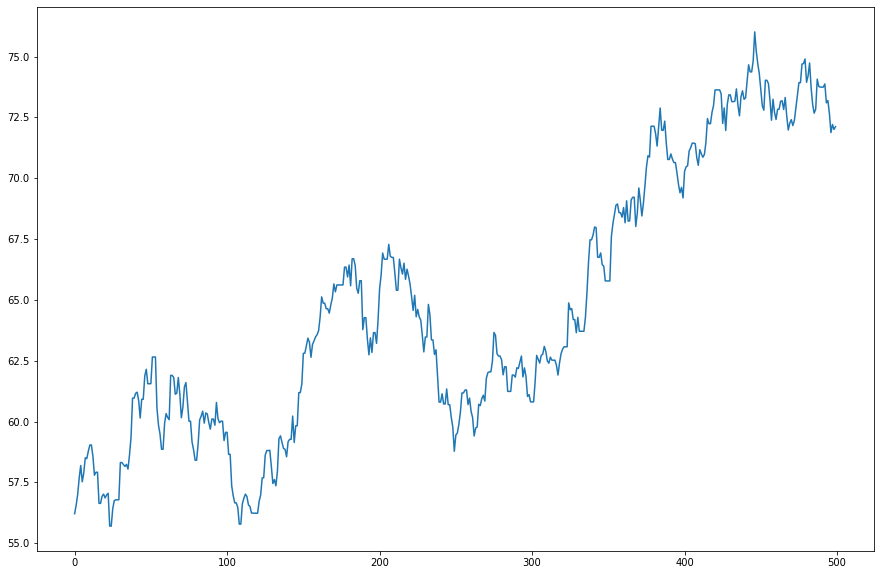

In [19]:
filled = df.preco.fillna(method='ffill')
(_, ax) = plt.subplots(1, 1, figsize=(15, 10))
ax.plot(filled)

In [20]:
quilometros_dia_base = 15
quilometros_viajados = np.random.uniform(0.1, 1, size=N)
quilometros_viajados = np.cumsum(quilometros_dia_base * quilometros_viajados)

# remove 20% dos valores
quilometros_viajados[np.random.randint(0, N, size=int(N * 0.2))] = None

df = pd.DataFrame(data={
    'km': quilometros_viajados
})

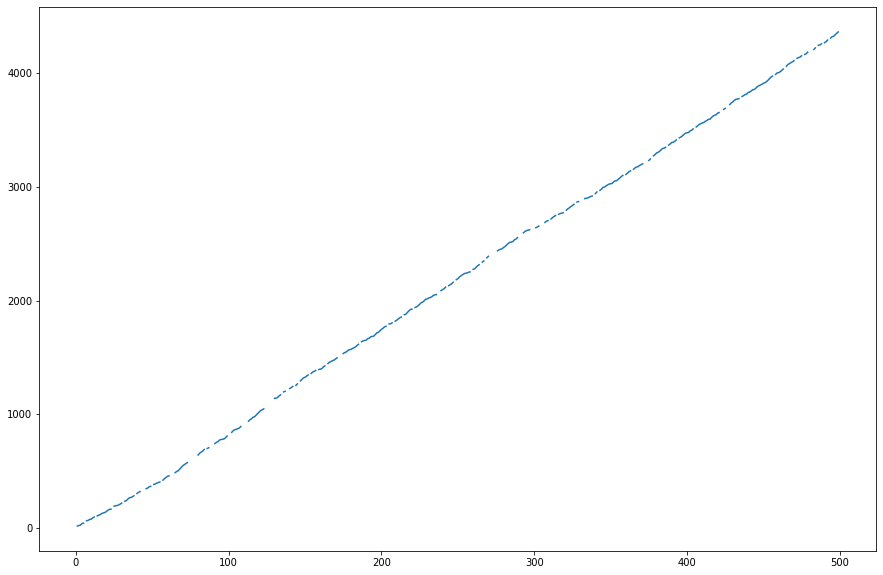

In [21]:
(_, ax) = plt.subplots(1, 1, figsize=(15, 10))
ax.plot(df.km)

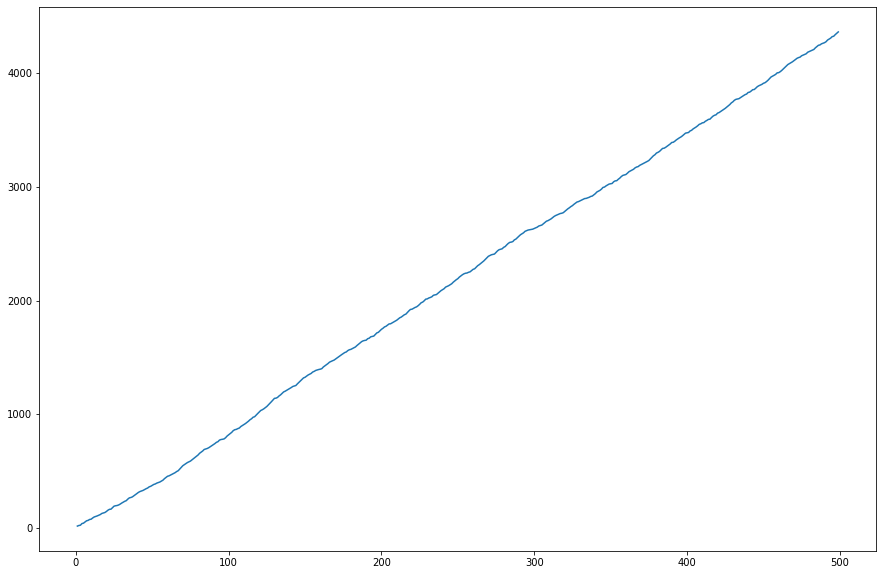

In [22]:
filled = df.km.interpolate(method='linear')
(_, ax) = plt.subplots(1, 1, figsize=(15, 10))
ax.plot(filled)